In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Zomato data .csv')

In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
data.shape

(148, 7)

In [6]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


Convert the Data type column - Rating

In [17]:
def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return value

In [18]:
data['rate'] = data['rate'].apply(handlerate)

In [19]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [21]:
 data['listed_in(type)'].value_counts()


,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [22]:
import seaborn as sns

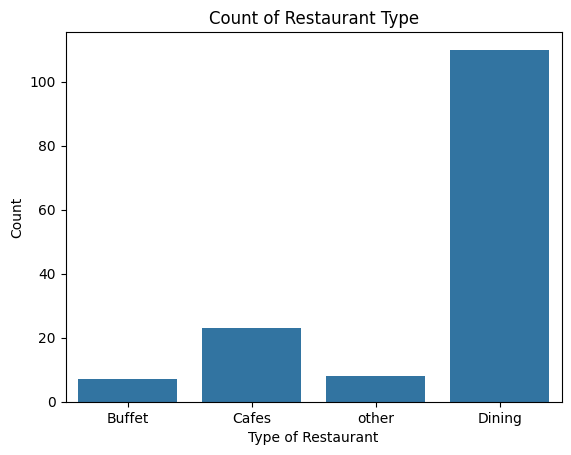

In [24]:
sns.countplot(x='listed_in(type)' , data =data)
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Count of Restaurant Type')
plt.show()

In [32]:
data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [33]:
# To see which restaurent recived the most vote
group_data = data.groupby('listed_in(type)')['votes'].sum()


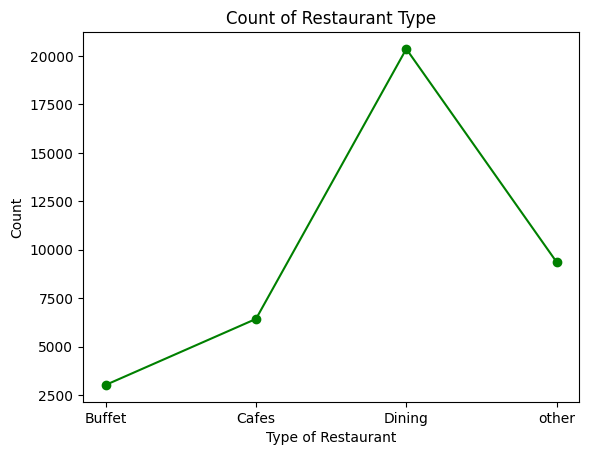

In [34]:
plt.plot(group_data , c='green' , marker ='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Count of Restaurant Type')
plt.show()

(array([56., 30., 30., 12., 20.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. ]),
 <BarContainer object of 5 artists>)

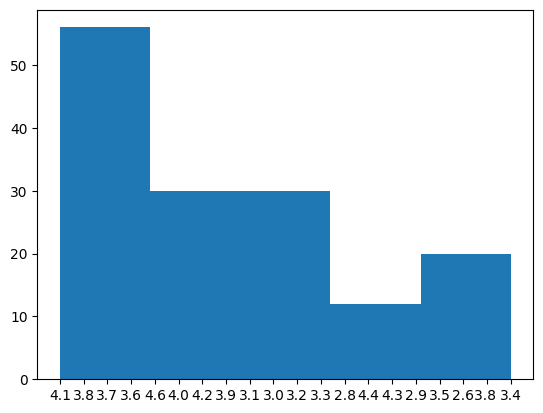

In [44]:
plt.hist(data['rate'] ,bins =5)

In [45]:
# Majority restaurent recived ratings from 3.5 to 4.0

In [46]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [47]:
# Average Orders Spending From Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

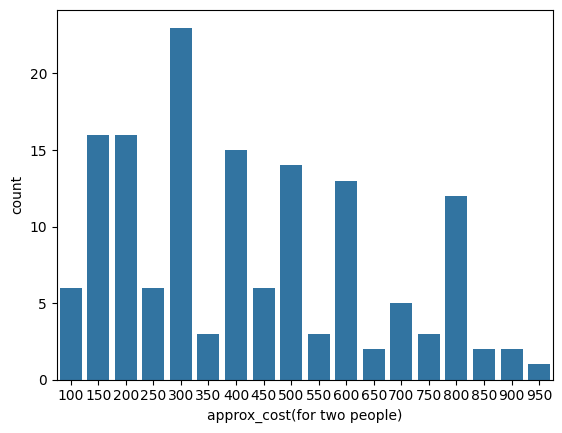

In [48]:
couple = data['approx_cost(for two people)']
sns.countplot(x=couple)

In [49]:
# so by the plot we got to know that the average spending is around 300rs
# so by this analysis we would show the items to most of the customer items that are around 300rs


<Axes: xlabel='online_order', ylabel='rate'>

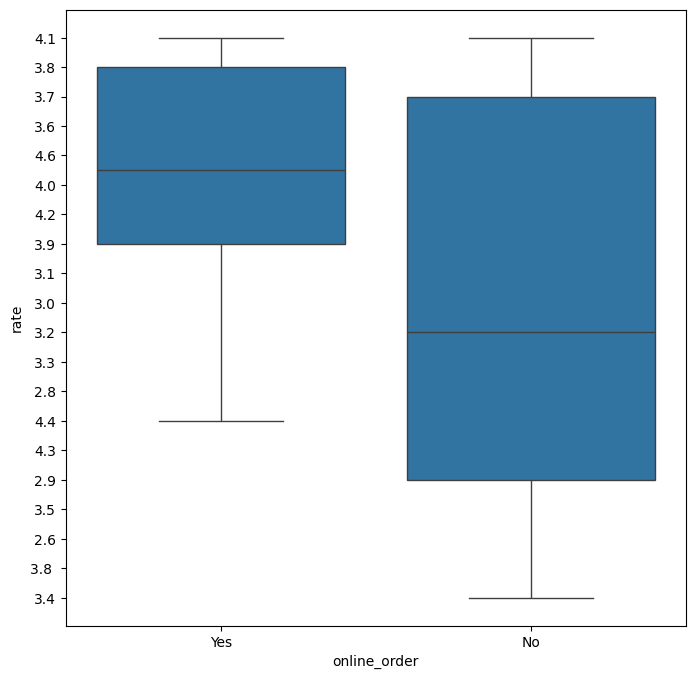

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order' , y='rate' , data =data)

In [52]:
# by the count plot we get to know that online order gets higher rating than the offline order

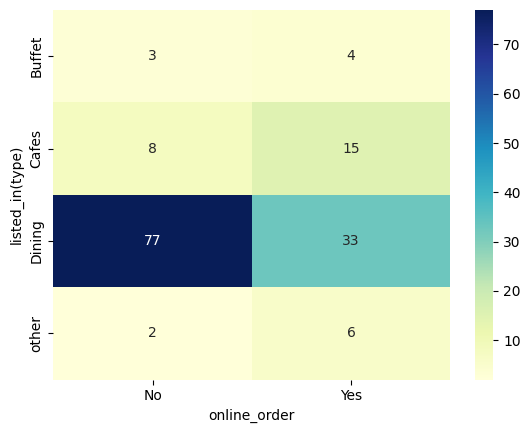

In [59]:
pivot = data.pivot_table(index ='listed_in(type)' , columns = 'online_order' , aggfunc='size' , fill_value=0)
sns.heatmap(pivot , annot = True , cmap = 'YlGnBu' , fmt='d')
plt.show()